Una empresa fabrica dos productos A y B en dos máquinas. Todo lo que se fabrica se vende en el mercado, ya que el mercado para el producto es bueno. Las capacidades de las máquinas están limitadas a producir diariamente 80 unidades del producto A y 60 unidades del producto B. El suministro de materia prima requerida para el producto está limitado a producir 600 unidades por día. La mano de obra requerida es de 160 días/hombre y la organización cuenta con 160 hombres en planta. La producción de A requiere una hora-día de trabajo y la del producto B es de 2 horas por día/hombre. El objetivo de la empresa es maximizar el beneficio total si las relaciones precio de venta son las que se indican a continuación.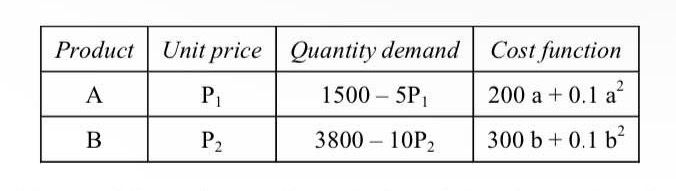

#Funcion Objetiva
Maximizar Z = R - C = 100a + 0.3a²+80b-0.2b²

#Reestricciones

Capacidades de producción de las máquinas: a≤80 , b≤60.
Suministro de materia prima: a+b≤600.
Requerimientos laborales: a+2b≤160 (ya que la producción de A requiere un hombre-día de trabajo y la de B requiere dos).
Demanda del mercado, que define a y b como funciones del precio:
a=1500−5*P1
b=3800−10*P2

#Variables de decision:

a: Número de unidades del producto A producidas.
b: Número de unidades del producto B producidas.


In [36]:
%pip install -q amplpy
from amplpy import AMPL, ampl_notebook, Environment
ampl = ampl_notebook(
    modules=["baron", "cplex"], # pick from over 20 modules including most commercial and open-source solvers
    license_uuid="5b397525-72ce-4c8e-805c-f16d507f0910") # your license UUID (e.g., free ampl.com/ce or ampl.com/courses licenses)

Licensed to AMPL Community Edition License for <alejandro.avilavl@uanl.edu.mx>.


In [47]:
# Crear una instancia de AMPL
ampl = AMPL(Environment())

In [54]:
# Escoger el solver apropiado
ampl.setOption('solver', 'baron')


In [59]:
#Reseteamos el modelo
ampl.reset()

#Modelamos nuestro problema
ampl.eval("""
# Declaración de las variables
var a >= 0; # unidades de A
var b >= 0; # unidades de B

# Parámetros para los precios
param P1;
param P2;

# Función objetivo
maximize Profit: 100*a +0.3*a**2+80*b-0.2*b**2;

# Restricciones
subject to MachineCapacityA: a <= 80;
subject to MachineCapacityB: b <= 60;
subject to MaterialSupply: a + b <= 600;
subject to Labour: a + 2*b <= 160;
""")

In [60]:
# Resolver el modelo
ampl.solve()

BARON 23.3.11 (2023.03.11): 0 iterations, optimal within tolerances.
Objective 12800


In [61]:
# Imprimir la solución
print('Cantidad de producto A a producir:', ampl.getVariable('a').value())
print('Cantidad de producto B a producir:', ampl.getVariable('b').value())
print('Ganancia total:', ampl.getObjective('Profit').value())

Cantidad de producto A a producir: 80.0
Cantidad de producto B a producir: 40.00000000399989
Ganancia total: 12800.000000255994
